# HW 4 Programming Part

## Problem 1

Consider the problem of predicting if a letter is C or G. The data are stored in letterCG. There are 17 column: the first column is the target label 'C' or 'G', and the rest of the 16 columns are input features.
1.	lettr	capital letter	(C or G)
2.	x-box	horizontal position of box	(integer)
3.	y-box	vertical position of box	(integer)
4.	width	width of box			(integer)
5.	high 	height of box			(integer)
6.	onpix	total # on pixels		(integer)
7.	x-bar	mean x of on pixels in box	(integer)
8.	y-bar	mean y of on pixels in box	(integer)
9.	x2bar	mean x variance			(integer)
10.	y2bar	mean y variance			(integer)
11.	xybar	mean x y correlation		(integer)
12.	x2ybr	mean of x * x * y		(integer)
13.	xy2br	mean of x * y * y		(integer)
14.	x-ege	mean edge count left to right	(integer)
15.	xegvy	correlation of x-ege with y	(integer)
16.	y-ege	mean edge count bottom to top	(integer)
17.	yegvx	correlation of y-ege with x	(integer)

Split the data into training $70\%$ and validation $30\%$ parts, with a random state of $30$. 
1. Implement the Adaboost algorithm with decision tree with max depth=1 as the base classifier and use learning rate=0.2. Run Adaboost for 200 rounds (M=200). 

2. Use the staged_score() function (check the function description) on the validation data to get the accuracy score to find the optimal $M$. The final Adaboost ensemble uses the optimal $M$. 

3. Report the accuracy of prediction with the final ensemble for the validation instances.

4. Make a plot of the accuracy score vs ensemble size/rounds (M) for the training data. Make the same plot for the validation data on the same figure. What do you find?

(Hint: when you read the data using pandas.read_csv(), you need to set delim_whitespace to True)

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Reading in the data:
hw4_data= pd.read_csv('letterCG.data', delim_whitespace = True, header = 0)

In [4]:
#Feature Matrix
# Columns
X = hw4_data.iloc[:,1:]
X.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9


In [5]:
#Create target Vector
y = hw4_data.iloc[:, 0]
y.head()

0    C
1    C
2    G
3    C
4    G
Name: Class, dtype: object

In [6]:
# split the data into training 70% and validation 30% parts, with a random state of 30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=30)



1. Implement the Adaboost algorithm with decision tree with max depth=1 as the base classifier and use learning rate=0.2. Run Adaboost for 200 rounds (M=200). 

In [7]:
# Build AdaBoost Classifier
# Decision tree with max depth is set as default to 1
ada_clf = AdaBoostClassifier(n_estimators=200,
                             algorithm="SAMME.R", learning_rate=0.2)
ada_clf.fit(X_train, y_train);

In [11]:
# Check the accuracy score on the test data
ada_clf.score(X_test, y_test)

0.9470198675496688

2. Use the staged_score() function (check the function description) on the validation data to get the accuracy score to find the optimal $M$. The final Adaboost ensemble uses the optimal $M$. 

In [22]:
# Using the staged_score() function 
# Method of Adaboost
# M is the number of models you use

staged_score = ada_clf.staged_score(X_test, y_test, sample_weight=None)

# Now we must convert the staged_score variable to a list
staged_score_list = list(staged_score)

# Now we need to convert the list into a numpy array
staged_score_array = np.asarray(staged_score_list)

np.where(staged_score_array == np.amax(staged_score_array))

(array([142, 169, 172], dtype=int64),)

As python uses 0-based indexing, the optimal M is 143. 

3. Report the accuracy of prediction with the final ensemble for the validation instances.

In [38]:
# Build AdaBoost with max_model we just found
ada_clf_optimal = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=1), n_estimators=max_model,
algorithm="SAMME.R", learning_rate=0.2)
ada_clf_optimal.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.2, n_estimators=143)

In [41]:
# Check the accuracy score on the test data
accuracy_optimal=ada_clf_optimal.score(X_test, y_test)

print('The accuracy score for the final ensemble is the following:', accuracy_optimal)

The accuracy score for the final ensemble is the following: 0.9514348785871964


4. Make a plot of the accuracy score vs ensemble size/rounds (M) for the training data. Make the same plot for the validation data on the same figure. What do you find?

In [25]:
from matplotlib import pyplot as plt

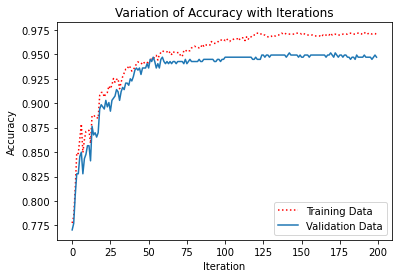

In [31]:
#Plot Iteration based score
traing_data_scores = list(ada_clf.staged_score(X_train,y_train))
test_data_scores = list(ada_clf.staged_score(X_test, y_test))

plt.plot(traing_data_scores, "r:",label='Training Data')
plt.plot(test_data_scores, label='Validation Data')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title("Variation of Accuracy with Iterations")
plt.legend();

Notice that the Training Data keeps increasing as the Validation Data goes back down and levels off. 
Thus, we are overfitting the data.